# 数据集

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
# load data
iris = load_iris()

##------------------------------------------------------------
'''
iris的数据集中
iris.data是150x4的矩阵，即150个样本，每个样本均4个特征(花萼长 X^(1); 花萼宽 X^(2); 花瓣长 X^(3); 花瓣宽 X^(4))
iris.target即标签：
                前50个样本的标签为0
                中50个样本的标签为1
                后50个样本的标签为2
之前perceptron和kNN,我们都是拿前100个样本，仅取X^(1)和X^(2)做特征进行的练习
同时由于perceptron要求标签为-1和+1,所以我们对标签有修改

NB这里我们依旧使用iris数据集前100个样本，每个样本取前2个特征，总共2类标签-1(原本是0)/1
'''
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df = df.iloc[:100,[0,1,-1]]
data = np.array(df)
X,y = data[:,:-1], data[:,-1]
y[y==0] = -1

# 01 perceptron

-- Epoch 1
Norm: 1.92, NNZs: 2, Bias: 0.000000, T: 100, Avg. loss: 0.479000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.85, NNZs: 2, Bias: 0.000000, T: 200, Avg. loss: 0.442000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.77, NNZs: 2, Bias: 0.000000, T: 300, Avg. loss: 0.405000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 7.69, NNZs: 2, Bias: 0.000000, T: 400, Avg. loss: 0.368000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.03, NNZs: 2, Bias: 0.000000, T: 500, Avg. loss: 0.346000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.61, NNZs: 2, Bias: -1.000000, T: 600, Avg. loss: 0.780600
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.32, NNZs: 2, Bias: -1.000000, T: 700, Avg. loss: 0.352500
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 11.10, NNZs: 2, Bias: -1.000000, T: 800, Avg. loss: 0.315500
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 12.39, NNZs: 2, Bias: -1.000000, T: 900, Avg. loss: 0.306100
Total training time: 0.00 seco

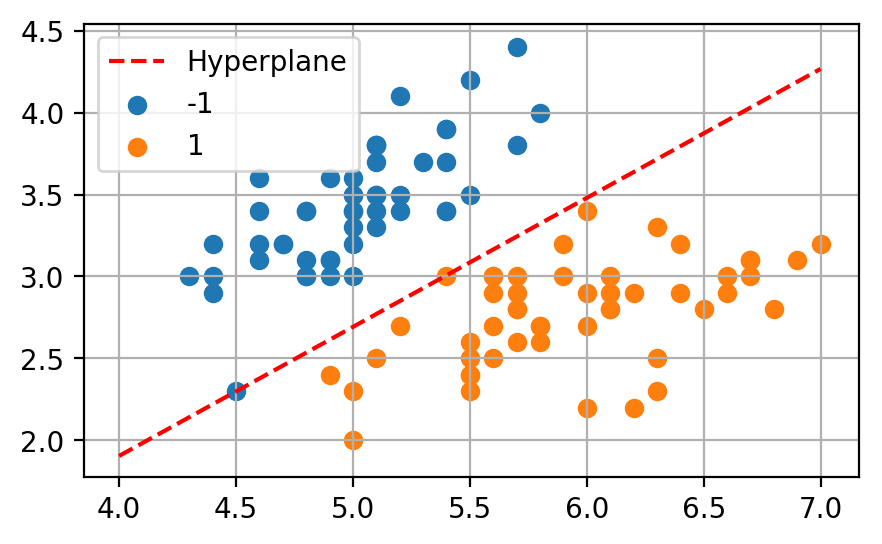

In [24]:
from sklearn.linear_model import Perceptron

## fit_intercept, bool, default=True Whether the intercept should be estimated or not. If False, the data is assumed to be already centered.
## fit_intercept一般就保持默认，即我们认为超平面不一定过原点。如果十分确定S过原点，才设置为False
## eta0即学习率，默认1.0
## tol: float or None, default=1e-3
## The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).
clf = Perceptron(fit_intercept=True, eta0=1, max_iter=1000, shuffle=False, verbose=1, tol=None)
clf.fit(X, y)
w = clf.coef_[0] # e.g., clf.coef_=[[5,10]]; w=[5,10]
print(w)
b = clf.intercept_
print(b)

x_ponits = np.arange(4, 8)
y_ = -(w[0]*x_ponits + b)/w[-1]  # 分母乘过去就是AX+BY+C=0
plt.figure(figsize=[5,3],dpi=200)
plt.plot(x_ponits, y_,'r--',label='Hyperplane')
plt.scatter(df.iloc[:50,0], df.iloc[:50,1], label='-1')
plt.scatter(df.iloc[50:100,0], df.iloc[50:100,1], label='1')
plt.grid()
plt.legend()
plt.show()

# 02 knn

1.0
[-1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


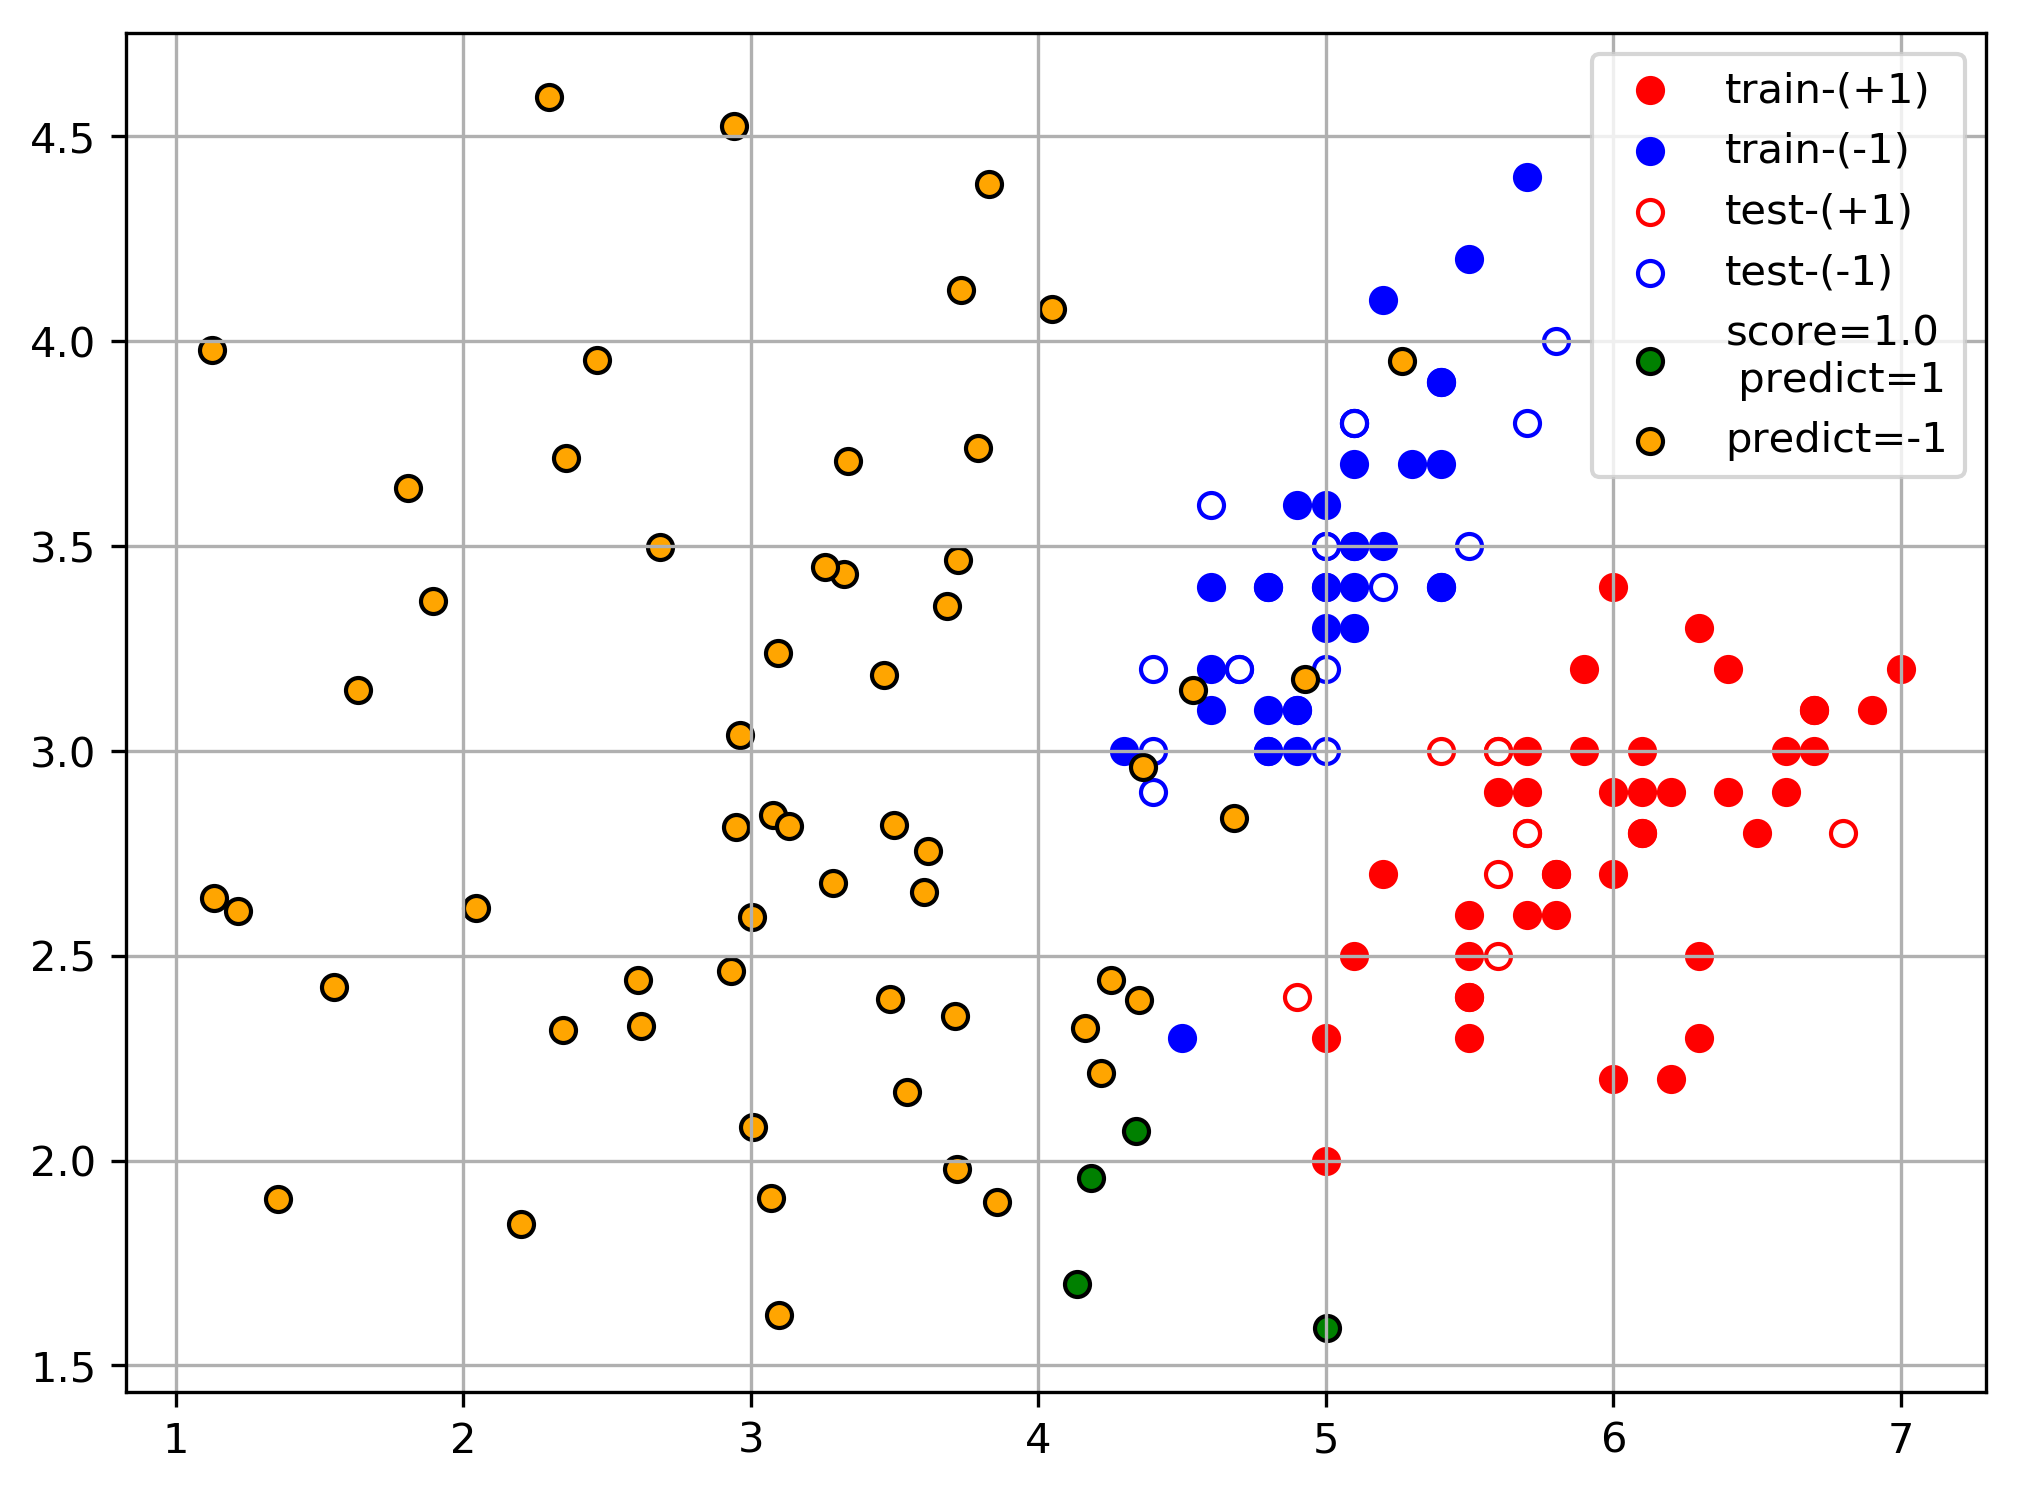

In [25]:
from sklearn.model_selection import train_test_split
# 将数据集和标签集进行划分，20%作为训练集，其余做测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3,  algorithm='kd_tree', p=2, metric='minkowski')
# n_neighbors=3, KNN的k=3
# algorithm ={‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
# p=Power parameter for the Minkowski metric, 即范数指标，Lp的p
# metric='minkowski'，Metric to use for distance computation

plt.figure(figsize=[8,6],dpi=300)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='r',label='train-(+1)');
plt.scatter(X_train[y_train==-1,0],X_train[y_train==-1,1],c='b',label='train-(-1)');


plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c='white',edgecolors='r',label='test-(+1)');
plt.scatter(X_test[y_test==-1,0],X_test[y_test==-1,1],c='white',edgecolors='b',label='test-(-1)');

knn1.fit(X_train, y_train)
print(knn1.score(X_test, y_test))

# test_p = np.array([[6,3],[5,3]])
# test_p = np.array([[6,3],[4.5,2.8],[5.6,5.6],[3.5,3],[6.5,5]])
test_p = np.random.normal(3, 1, size=120).reshape(60,2)
print(knn1.predict(test_p))

plt.scatter(test_p[knn1.predict(test_p)==+1,0],test_p[knn1.predict(test_p)==+1,1],c='green',edgecolors='k',label=f'score={knn1.score(X_test, y_test)}\n predict=1')
plt.scatter(test_p[knn1.predict(test_p)==-1,0],test_p[knn1.predict(test_p)==-1,1],c='orange',edgecolors='k',label='predict=-1')

plt.legend()
plt.grid()
plt.show()

# 03 NB

gaussian score:1.0
bernoulli score:0.44
multionmial score:0.46
categorical score:0.94
complement score:1.0


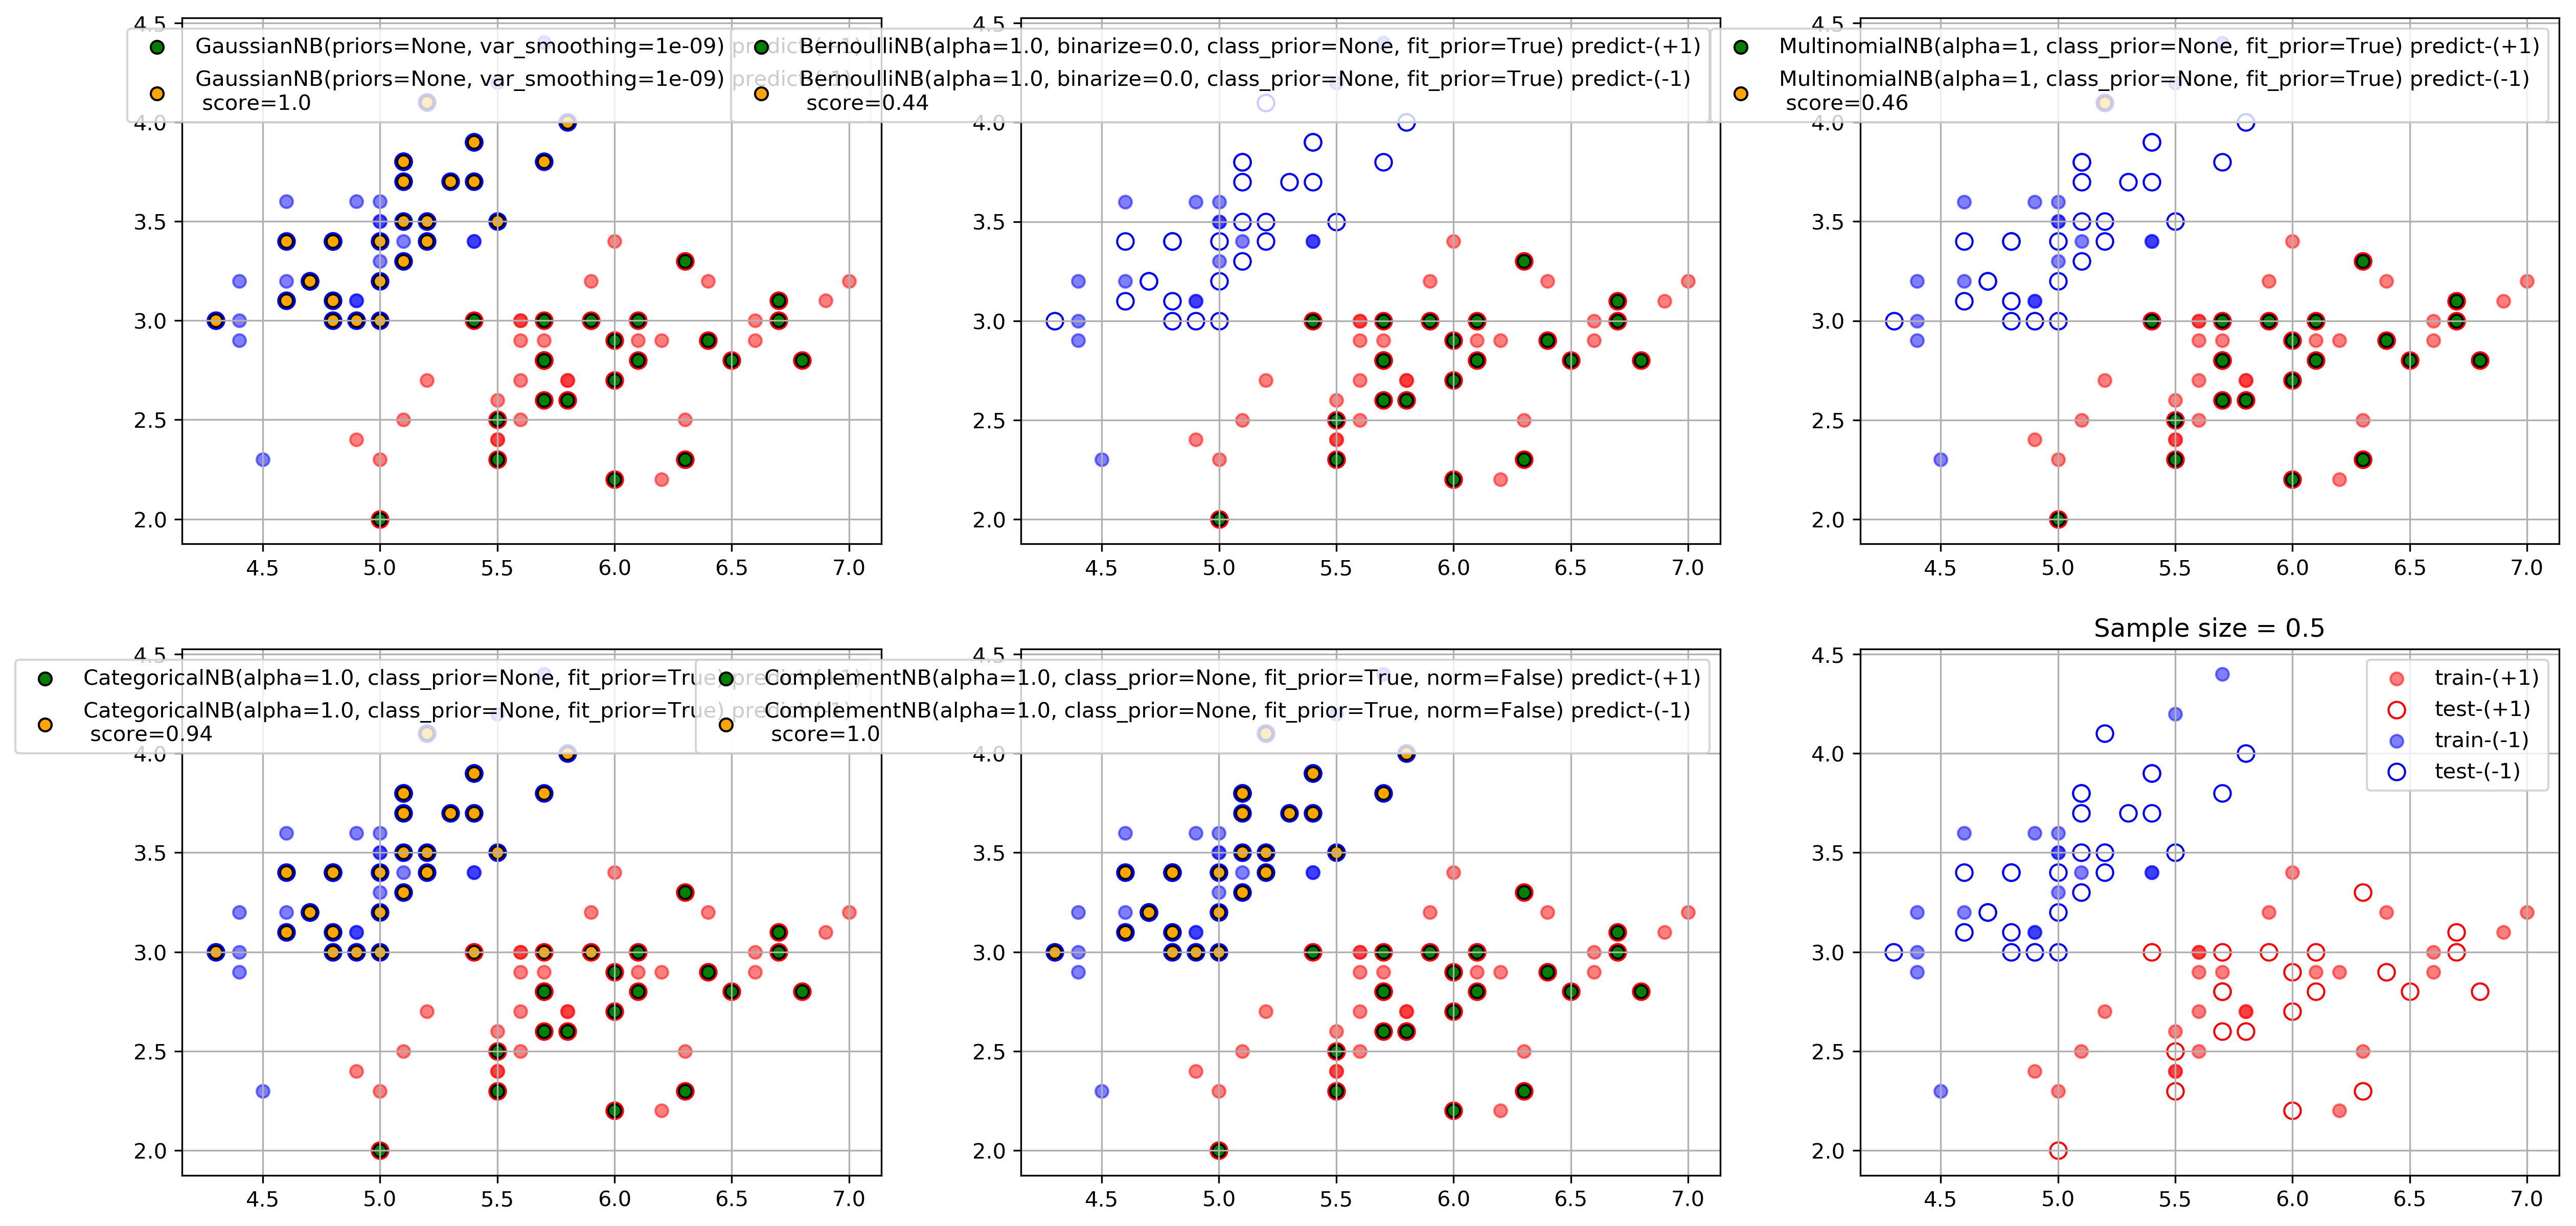

In [26]:

from sklearn.model_selection import train_test_split
# 将数据集和标签集进行划分，30%作为训练集，其余做测试集
test_Size_nB=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_Size_nB, random_state=2)

import sklearn.naive_bayes as bayes
gNB = bayes.GaussianNB()
bNB = bayes.BernoulliNB()
mNB = bayes.MultinomialNB(alpha=1,fit_prior=True)
catNB = bayes.CategoricalNB()
comNB = bayes.ComplementNB()

gNB.fit(X_train, y_train)
bNB.fit(X_train, y_train)
mNB.fit(X_train, y_train)    #输入数据出现负值,不能使用MultinomialNB
catNB.fit(X_train, y_train)
comNB.fit(X_train, y_train)

# 输出准确率
score_gaussian    = gNB.score(X_test,y_test)
score_bernoulli   = bNB.score(X_test,y_test)
score_multionmial = mNB.score(X_test,y_test)
score_categorical = catNB.score(X_test, y_test)
score_complement  = comNB.score(X_test, y_test)

print("gaussian score:"   +str(score_gaussian))
print("bernoulli score:"  +str(score_bernoulli))
print("multionmial score:"+str(score_multionmial))
print("categorical score:"+str(score_categorical))
print("complement score:" +str(score_complement))

plt.figure(figsize=[20,10],dpi=300)

for fig_loc, nb_type in zip([231,232,233,234,235,236], [gNB, bNB, mNB, catNB, comNB, None]):
    if nb_type is not None:
        nb_predict = nb_type.predict(X_test)
        plt.subplot(fig_loc)
        plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],  c='r',alpha=0.5);
        plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c='white',  edgecolors='r',s=60);
        plt.scatter(X_test[nb_predict==1,0], X_test[nb_predict==1,1], c='green', edgecolors='k',label=f'{nb_type} predict-(+1)');

        
        plt.scatter(X_train[y_train==-1,0],X_train[y_train==-1,1],c='b',alpha=0.5);
        plt.scatter(X_test[y_test==-1,0],X_test[y_test==-1,1],c='white',edgecolors='b',s=60);
        plt.scatter(X_test[nb_predict==-1,0],X_test[nb_predict==-1,1],c='orange',edgecolors='k',label=f'{nb_type} predict-(-1)\n score={nb_type.score(X_test,y_test)}');
        plt.grid()
        plt.legend(loc='best')
    else:
        plt.subplot(fig_loc)
        plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],  c='r',label='train-(+1)',alpha=0.5);
        plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c='white',  edgecolors='r',s=60,label='test-(+1)');
        plt.scatter(X_train[y_train==-1,0],X_train[y_train==-1,1],c='b',label='train-(-1)',alpha=0.5);
        plt.scatter(X_test[y_test==-1,0],X_test[y_test==-1,1],c='white',edgecolors='b',s=60,label='test-(-1)');
        plt.grid()
        plt.legend()

plt.title(f'Sample size = {test_Size_nB}')
plt.show()


# 04 DT (no iris)

习题5.1 分类树

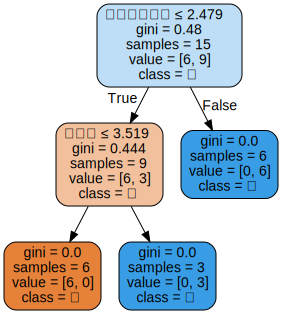

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd

from sklearn import tree
import graphviz

features = ["年龄", "有工作", "有自己的房子", "信贷情况"]
X = pd.DataFrame([
    ["青年", "否", "否", "一般"],
    ["青年", "否", "否", "好"],
    ["青年", "是", "否", "好"],
    ["青年", "是", "是", "一般"],
    ["青年", "否", "否", "一般"],
    ["中年", "否", "否", "一般"],
    ["中年", "否", "否", "好"],
    ["中年", "是", "是", "好"],
    ["中年", "否", "是", "非常好"],
    ["中年", "否", "是", "非常好"],
    ["老年", "否", "是", "非常好"],
    ["老年", "否", "是", "好"],
    ["老年", "是", "否", "好"],
    ["老年", "是", "否", "非常好"],
    ["老年", "否", "否", "一般"]
])

y = pd.DataFrame(["否", "否", "是", "是", "否",
                "否", "否", "是", "是", "是",
                "是", "是", "是", "是", "否"])
class_names = [k for k in np.unique(y)] # np.unique(y)找出y中所有不重复的元素（重复的元素仅记录1次）

# # 数据预处理(transform non-numerical labels to numerical labels)
le_x = preprocessing.LabelEncoder() # 实例化
le_x.fit(np.unique(X))
# # np.unique(X)=['一般', '中年', '否', '好', '是', '老年', '青年', '非常好']
X = X.apply(le_x.transform) # Transform labels to normalized encoding.
# print(X)

# 调用sklearn的DecisionTreeClassifier建立决策树模型
model_tree = DecisionTreeClassifier(criterion='gini', splitter="random")
'''
01-criterion: 特征选择标准, "gini"或者"entropy", 注意"gini"代替了信息增益比
02-splitter: 特征划分点选择标准，"best"或者"random"
03-max_depth：决策树最大深
04-min_samples_split：内部节点再划分所需最小样本数。
                    如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2
05-min_samples_leaf： 叶子节点最少样本数
                    如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1
06-min_impurity_split: 阈值
                    如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值
                    则该节点不再生成子节点，该节点置为叶节点
07-max_features： int, float or {“auto”, “sqrt”, “log2”}, None （如果样本特征数不多，比如小于50，我们用默认的"None"就可以了）

其他注意事项：样本数比特征数多一些会比较容易建立健壮的模型
'''
# 训练模型
model_tree.fit(X, y)

# 导出决策树的可视化文件，文件格式是dot
dot_data = tree.export_graphviz(model_tree, out_file=None,
                                feature_names=features,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
# 使用graphviz包，对决策树进行展示
graph = graphviz.Source(dot_data)
# 可使用view方法展示决策树
# 中文乱码：需要对源码_export.py文件（文件路径：sklearn/tree/_export.py）修改，
# 在文件第451行中将helvetica改成SimSun
graph


In [28]:
# 打印决策树
tree_text = tree.export_text(model_tree, feature_names=features)
print(tree_text)

|--- 有自己的房子 <= 3.48
|   |--- 有工作 <= 3.09
|   |   |--- class: 否
|   |--- 有工作 >  3.09
|   |   |--- class: 是
|--- 有自己的房子 >  3.48
|   |--- class: 是



习题5.2 回归树

0.8751579831457724


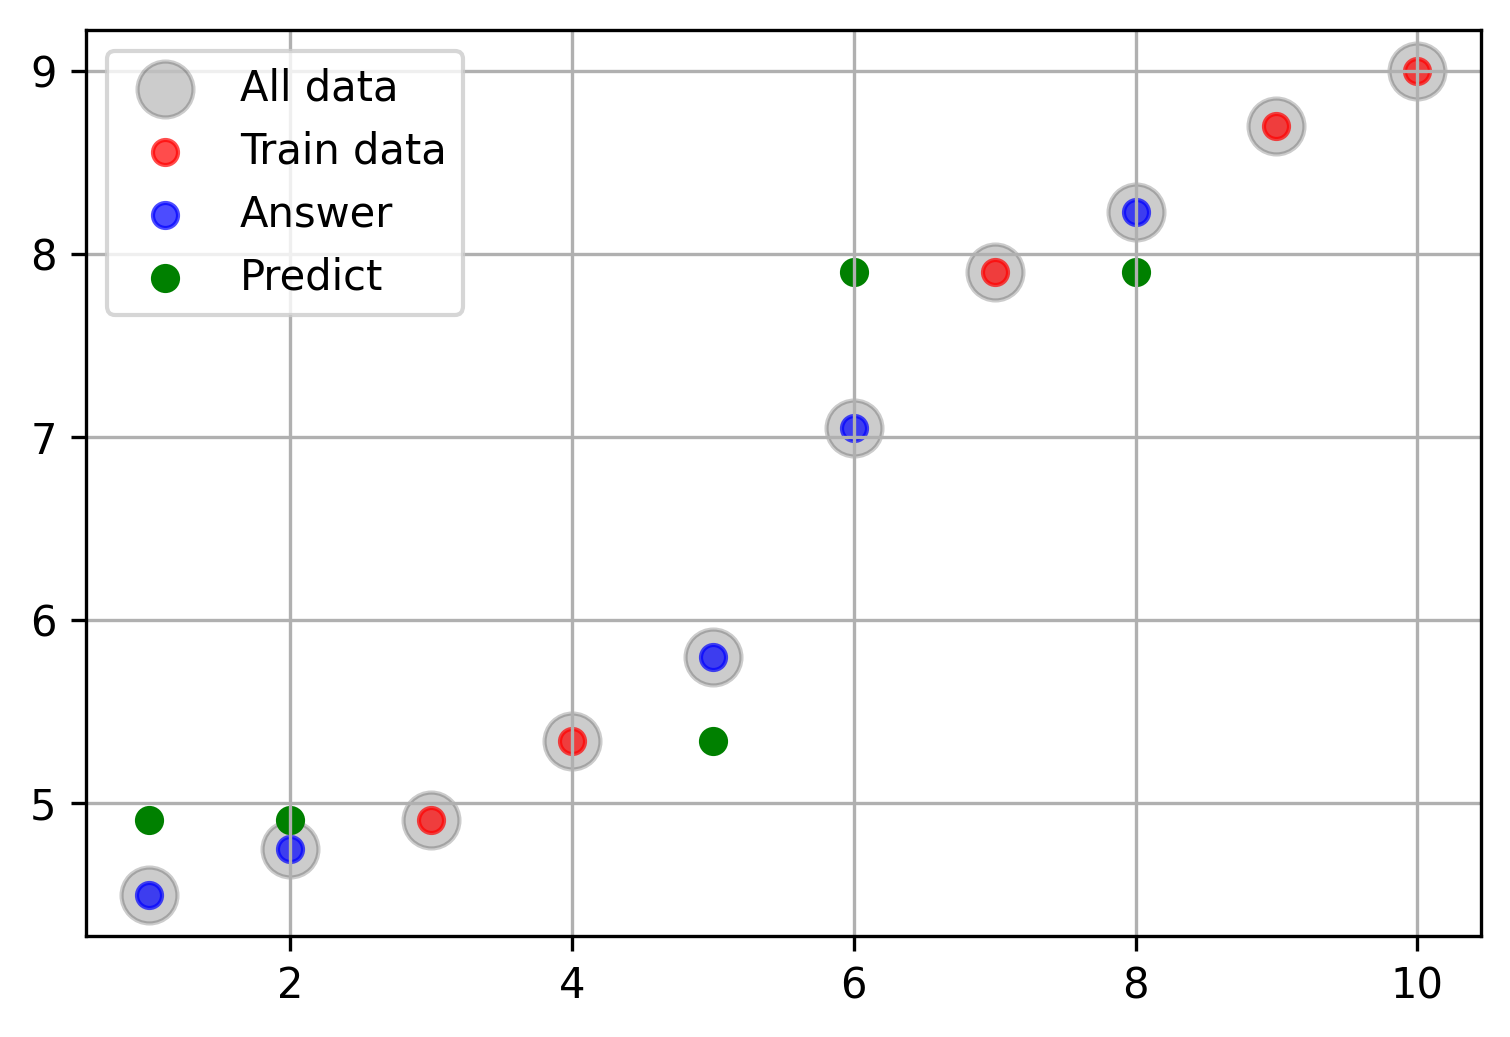

In [27]:
X=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1) # 保证是1列，因为只有1个特征
y=np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00])

from sklearn.model_selection import train_test_split
test_Size=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_Size, random_state=2)

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(criterion="squared_error")
# criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
clf.fit(X_train,y_train)

plt.figure(figsize=[6,4],dpi=300)
plt.scatter(X,y, c='k',alpha=0.2, s=180, label='All data')
plt.scatter(X_train,y_train, c='r',alpha=0.7, label='Train data')
plt.scatter(X_test, y_test,  c='b',alpha=0.7, label='Answer')

plt.scatter(X_test, clf.predict(X_test), c='g', label='Predict')
print(clf.score(X_test, y_test))
plt.legend(loc='best');plt.grid()
plt.show()